<a href="https://colab.research.google.com/github/Namyalg/Projects_in_python/blob/master/Sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

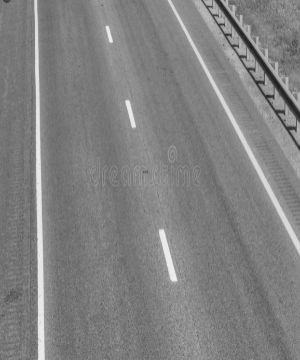

(360, 300)


In [62]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Image is converted to grayscale
img = cv2.imread('/content/lane.PNG',0)
img = cv2.resize(img, (300, 360))
cv2_imshow(img)
print(img.shape)

In [59]:
#The kernel used for creating a blur effect
#kernel = np.array([0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]).reshape(3,3)
#works fine for this

height = img.shape[0]
width = img.shape[1]
print(height, width)

#360 by width
#300 by height

361 578


In [63]:
pixels = []
kernel = np.array([-1,-2,-1,0,0,0,1,2,1]).reshape(3,3)
#pixels are extracted from the image converted to grayscale
for i in range(360):
  for j in range(300):
    pixels.append(img[i,j])

#The pixels array is resized in accordance with the size of the image
pixels = np.array(pixels).reshape(360,300)

#To handle the edge cases, sentinel values are used
#The pixels array is bound by zeros on all edges

          # 00000000
          # 0PIXELS0
          # 00000000
#This is done to ensure that the kernel is applied to all the pixels
#Sentinel values to ensure the edges arent missed out

#Along the rows and columns
pixels = np.insert(pixels , [0,360] , np.zeros(len(pixels[0])) , axis = 0)
pixels = np.insert(pixels , [0,300] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1)

#Convolution is applied here
convoluted_Y = []
for i in range(1,360):
  for j in range(1,300):
    temp = pixels[i:i+3 , j:j+3]
    product = np.multiply(temp,kernel)
    convoluted_Y.append(sum(sum(product)))

convoluted_Y = np.array(convoluted_Y).reshape(359,299)

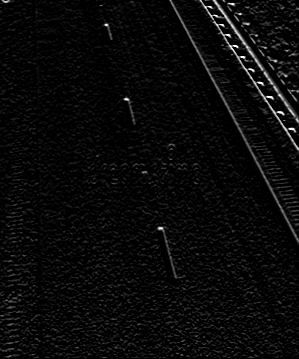

In [64]:
cv2_imshow(convoluted_Y)

In [65]:
pixels = []
kernel = np.array([-1,-10,-1,0,0,0,1,10,1]).reshape(3,3).transpose()
#pixels are extracted from the image converted to grayscale
for i in range(360):
  for j in range(300):
    pixels.append(img[i,j])

#The pixels array is resized in accordance with the size of the image
pixels = np.array(pixels).reshape(360,300)

#To handle the edge cases, sentinel values are used
#The pixels array is bound by zeros on all edges

          # 00000000
          # 0PIXELS0
          # 00000000
#This is done to ensure that the kernel is applied to all the pixels
#Sentinel values to ensure the edges arent missed out

#Along the rows and columns
pixels = np.insert(pixels , [0,360] , np.zeros(len(pixels[0])) , axis = 0)
pixels = np.insert(pixels , [0,300] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1)

#Convolution is applied here
convoluted_X = []
for i in range(1,360):
  for j in range(1,300):
    temp = pixels[i:i+3 , j:j+3]
    product = np.multiply(temp,kernel)
    convoluted_X.append(sum(sum(product)))

convoluted_X = np.array(convoluted_X).reshape(359,299)

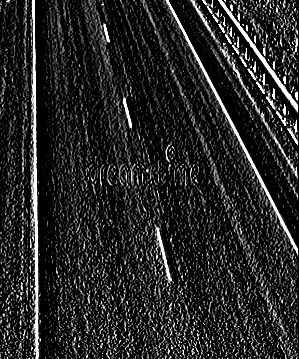

In [66]:
cv2_imshow(convoluted_X)

In [54]:
print(convoluted_X.shape)

(359, 299)


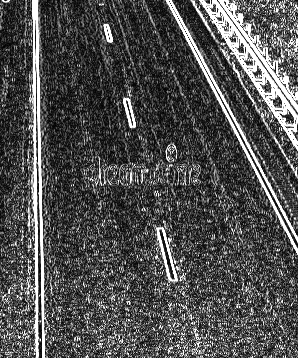

In [67]:
from math import sqrt
sobel = []
for i in range(359):
  for j in range(299):
    in_x = pow(convoluted_X[i,j] ,2)
    in_y = pow(convoluted_Y[i,j] , 2)    
    grad = sqrt(in_x + in_y)
    sobel.append(grad)


sobel = np.array(sobel).reshape(359, 299)

cv2_imshow(sobel)